In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
df = pd.read_csv('datos_seguro.csv')
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [118]:
df.describe()

,edad,compra
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


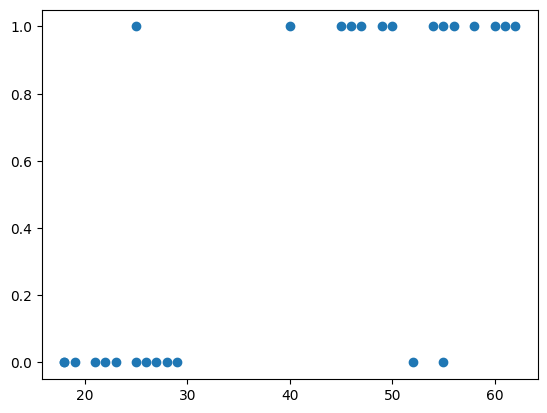

In [119]:
plt.scatter(df['edad'], df['compra'])

In [120]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[['edad']], df['compra'], test_size=0.2)

In [121]:
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

In [122]:
modelo.score(X_prueba, y_prueba)

0.8333333333333334

In [123]:
datos_nuevos = pd.DataFrame({'edad': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]})
datos_nuevos.head()

,edad
0,20
1,25
2,30
3,35
4,40


In [124]:
probabiidades = modelo.predict_proba(datos_nuevos)
probabiidades

array([[0.93278886, 0.06721114],
       [0.8646462 , 0.1353538 ],
       [0.74621318, 0.25378682],
       [0.57507925, 0.42492075],
       [0.38383396, 0.61616604],
       [0.22283554, 0.77716446],
       [0.11658963, 0.88341037],
       [0.05726794, 0.94273206],
       [0.02720024, 0.97279976],
       [0.01270637, 0.98729363]])

In [126]:
prob_compra = probabiidades[:, 1]
prob_compra

array([0.06721114, 0.1353538 , 0.25378682, 0.42492075, 0.61616604,
       0.77716446, 0.88341037, 0.94273206, 0.97279976, 0.98729363])

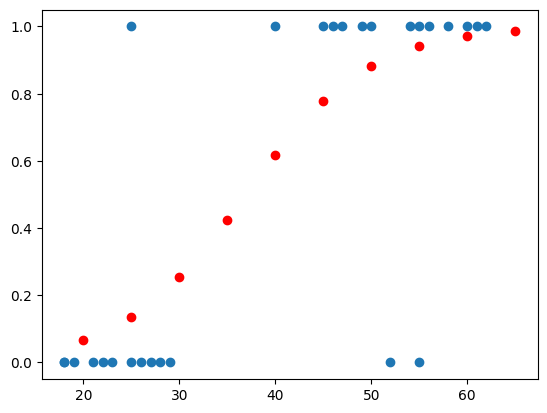

In [130]:
plt.scatter(df['edad'], df['compra'])
plt.scatter(datos_nuevos['edad'], prob_compra, color='red')